In [3]:
import pandas as pd
import os

In [4]:
df = pd.read_csv("../data/raw/Sales_April_2019.csv")
files = [file for file in os.listdir('../data/raw')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("../data/raw/" + file)
    all_months_data = pd.concat([all_months_data,df])
    all_months_data.to_csv("../data/raw/all_data.csv", index=False)


In [14]:
sales_raw = pd.read_csv("../data/raw/all_data.csv")
sales_raw.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [15]:
# sales_raw = 
# changes to right data types

sales_raw.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Clean the data 

In [16]:
sales_raw.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
# check for nan values
nan_df = sales_raw[sales_raw.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# drop rows for Nan
sales_dropna = sales_raw.dropna(how='all')
sales_dropna.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [19]:
# validate the nan vales have drop
sales_dropna.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

find 'or' and delete it

In [35]:
sales_clean = sales_dropna[sales_dropna["Order Date"].str[0:2] != 'Or']

In [36]:
sales_clean["Quantity Ordered"] = pd.to_numeric(sales_clean['Quantity Ordered']) # make int
sales_clean ["Price Each"]=pd.to_numeric(sales_clean['Price Each']) # make float
sales_clean.head()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2511390181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean["Quantity Ordered"] = pd.to_numeric(sales_clean['Quantity Ordered']) # make int
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2511390181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean ["Price Each"]=pd.to_numeric(sales_clean['Price Each']) # make float


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Convert columns to correct type

In [37]:
sales_clean['Month'] = sales_clean["Order Date"].str[0:2]
sales_clean['Month'] =sales_clean["Month"].astype('int32')
sales_clean.head()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2198958473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Month'] = sales_clean["Order Date"].str[0:2]
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2198958473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Month'] =sales_clean["Month"].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [38]:
sales_clean['Sales'] = sales_clean['Quantity Ordered'] * sales_clean["Price Each"]
sales_clean.head()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/245431006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Sales'] = sales_clean['Quantity Ordered'] * sales_clean["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Add a city column

In [39]:
#let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_clean['City'] = sales_clean['Purchase Address'].apply(lambda x:f"{ get_city(x)}  ({get_state(x)})")


sales_clean.head()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/182104895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['City'] = sales_clean['Purchase Address'].apply(lambda x:f"{ get_city(x)}  ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


1)  what was the best month for sales ? How much was earned that month?

In [26]:
import matplotlib.pyplot as plt

In [40]:
results = sales_clean.groupby('Month').sum()

In [41]:
# Month dictionary
months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# month_names = []
# for month in months_dict:
#     month_names.append(months_dict[month])


# month_names = [ months_dict[month_num] for month_num in months_dict]




In [42]:
x = range(1,13)
for i in x:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


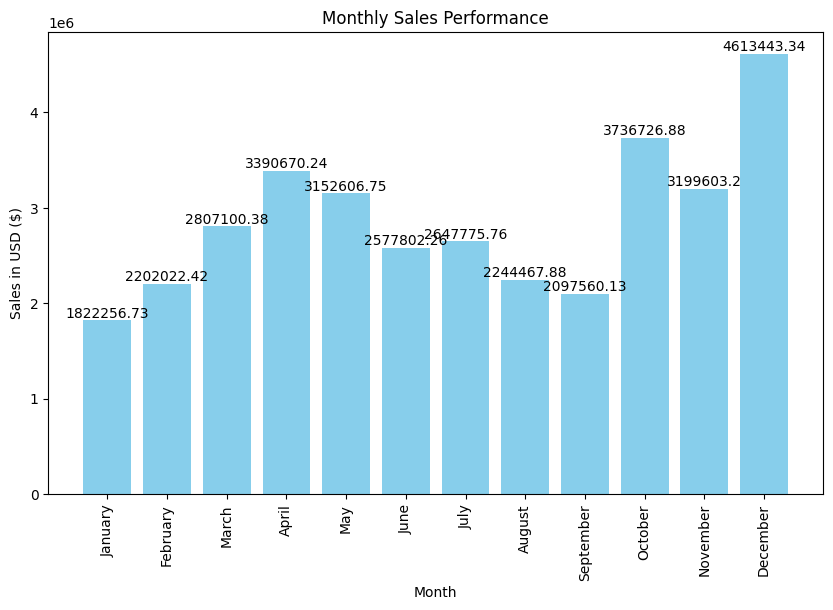

In [61]:
months_num = range(1,13)
months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_names = [ months_dict[month_num] for month_num in months_num]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size
bars = plt.bar(month_names, results['Sales'], color='skyblue')  # Customize color

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(rotation='vertical')
plt.title('Monthly Sales Performance')
#plt.grid(True)  # Add grid lines

plt.savefig('../docs/images/monthly_sales_performance.png')
plt.show()


2) what city had the highest number of sales?

In [66]:
results = all_data.groupby('Month').sum()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas (TX) New York City (NY) New York Cit...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland (ME) San Francisco (CA) New York C...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco (CA) Portland (OR) San Franci...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas (TX) Boston (MA) Los Angeles (CA) L...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland (OR) San Francisco (CA) Boston (M...


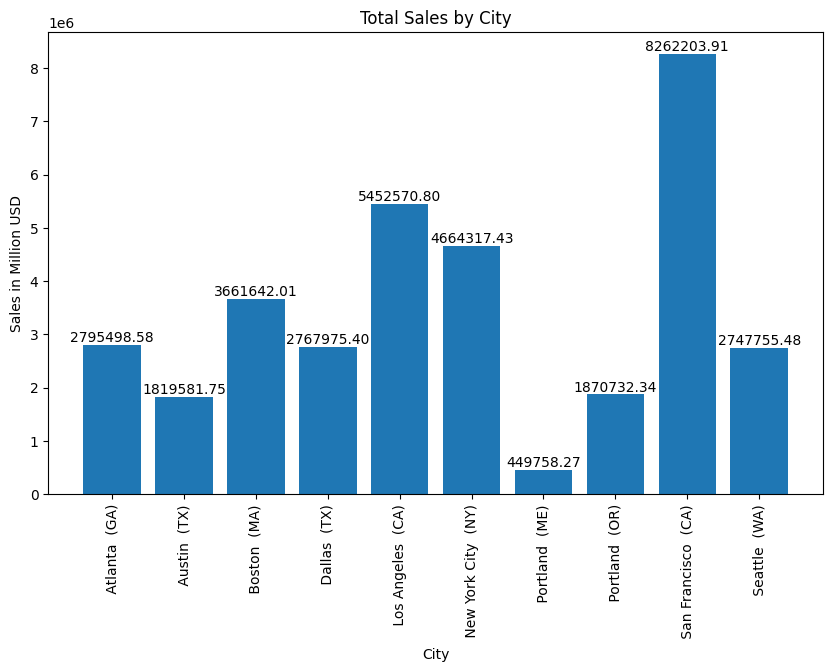

In [ ]:

import matplotlib.pyplot as plt


# Group the data by city and sum the sales figures
city_sales = sales_clean.groupby('City').sum()

# Extract cities and corresponding sales
cities = city_sales.index
sales = city_sales['Sales']

# Plot sales by city
plt.figure(figsize=(10, 6))  # Adjust size
bars = plt.bar(cities, sales, color='skyblue')  # Use a specific color scheme

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Plot sales by city
plt.bar(cities, sales)
plt.ylabel('Sales in Million USD')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability

plt.savefig('../docs/images/total_sales_by_city.png')
plt.show()


3) what time should we display advertisements to maximise likelihood of customers buying products

In [47]:
sales_clean['Order Date'] = pd.to_datetime(sales_clean['Order Date'])
sales_clean['Hour'] = sales_clean['Order Date'].dt.hour
sales_clean['Minute'] = sales_clean['Order Date'].dt.minute
sales_clean.head()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2030038341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Order Date'] = pd.to_datetime(sales_clean['Order Date'])
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2030038341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Hour'] = sales_clean['Order Date'].dt.hour
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/2030038341.py:3: SettingWithCopyWarning: 
A value is trying to be se

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


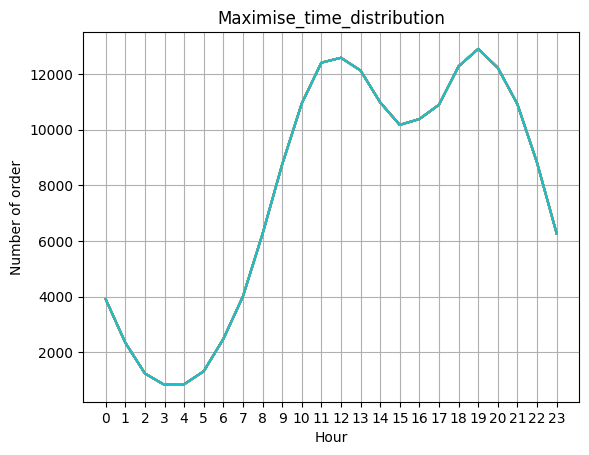

In [72]:
hours = [hour for hour, df in sales_clean.groupby('Hour')]

plt.plot(hours, sales_clean.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.title("Maximise_time_distribution")
plt.savefig('../docs/images/Maximise_time_distribution.png')
plt.ylabel('Number of order')
plt.grid()
plt.show()
# my recommendation is around 11am (11) 7pm(19)
# Saving the figure in local memory


4) what products are most often sold together

In [51]:

# Find duplicated orders based on 'Order ID'
duplicated_orders = sales_clean[sales_clean.duplicated(subset=['Order ID'], keep=False)]

# Group the duplicated orders by 'Order ID' and concatenate the 'Product' column
duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Select only 'Order ID' and 'Grouped' columns and drop duplicate rows
df = duplicated_orders[['Order ID', 'Grouped']].drop_duplicates()

df.head(10)


/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/3604422306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_orders['Grouped'] = duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [52]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


5) What product sold the most? why do you think it sold the most?

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/3328349080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Quantity Ordered'] = pd.to_numeric(sales_clean['Quantity Ordered'])


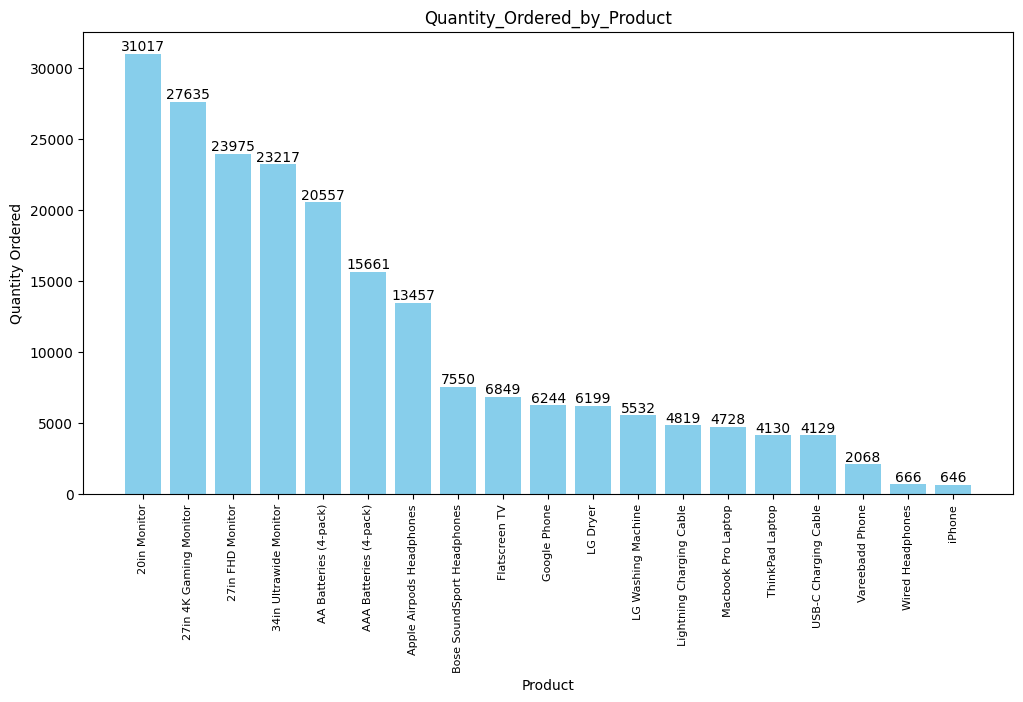

In [73]:

# Convert 'Quantity Ordered' column to numeric type if necessary
sales_clean['Quantity Ordered'] = pd.to_numeric(sales_clean['Quantity Ordered'])

# Group the data by product and sum the 'Quantity Ordered'
product_group = sales_clean.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()


# Sort the products by quantity ordered in descending order
quantity_ordered_sorted = quantity_ordered.sort_values(ascending=False)

# Extract product names
products = quantity_ordered.index

# Plot quantity ordered for each product
plt.figure(figsize=(12, 6))  # Adjust size
bars = plt.bar(products, quantity_ordered_sorted, color='skyblue')  # Use a specific color scheme

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


# Plot quantity ordered for each product
#plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Quantity_Ordered_by_Product')
plt.savefig('../docs/images/Quantity_Ordered_by_Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/3265728146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_clean['Price Each'] = pd.to_numeric(sales_clean['Price Each'], errors='coerce')
/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_1920/3265728146.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical',size=8)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored w

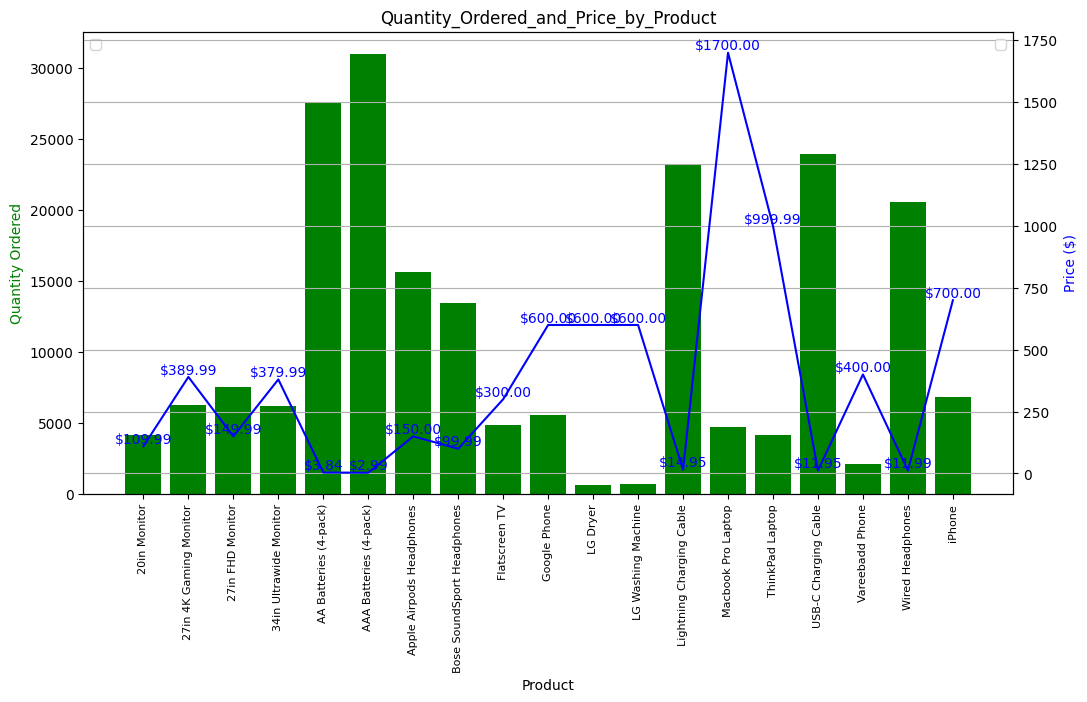

In [74]:
 #Convert 'Price Each' column to numeric type
sales_clean['Price Each'] = pd.to_numeric(sales_clean['Price Each'], errors='coerce')

# Group the data by product and calculate the mean price for each product
prices = sales_clean.groupby('Product')['Price Each'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize = (12,6))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')  # Use green color for quantity ordered
ax2.plot(products, prices, 'b-')  # Use blue color for prices

 #Adding data labels for prices
for x, y in zip(products, prices):
    ax2.text(x, y, '${:.2f}'.format(y), ha='center', va='bottom', color='blue')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.title('Quantity_Ordered_and_Price_by_Product')
plt.savefig('../docs/images/Quantity_Ordered_and_Price_by_Product.png')
plt.grid(axis='y')  # Add grid lines for better readability


plt.show()
